# Boston Housing - Price Predictor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('data.csv')

# Data Preprocessing

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       497 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,497.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284998,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705753,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data visualisation

We will start by creating a scatterplot matrix that will allow us to visualise the pair wise relationships between different features
This is also useful in quick checking for outliers

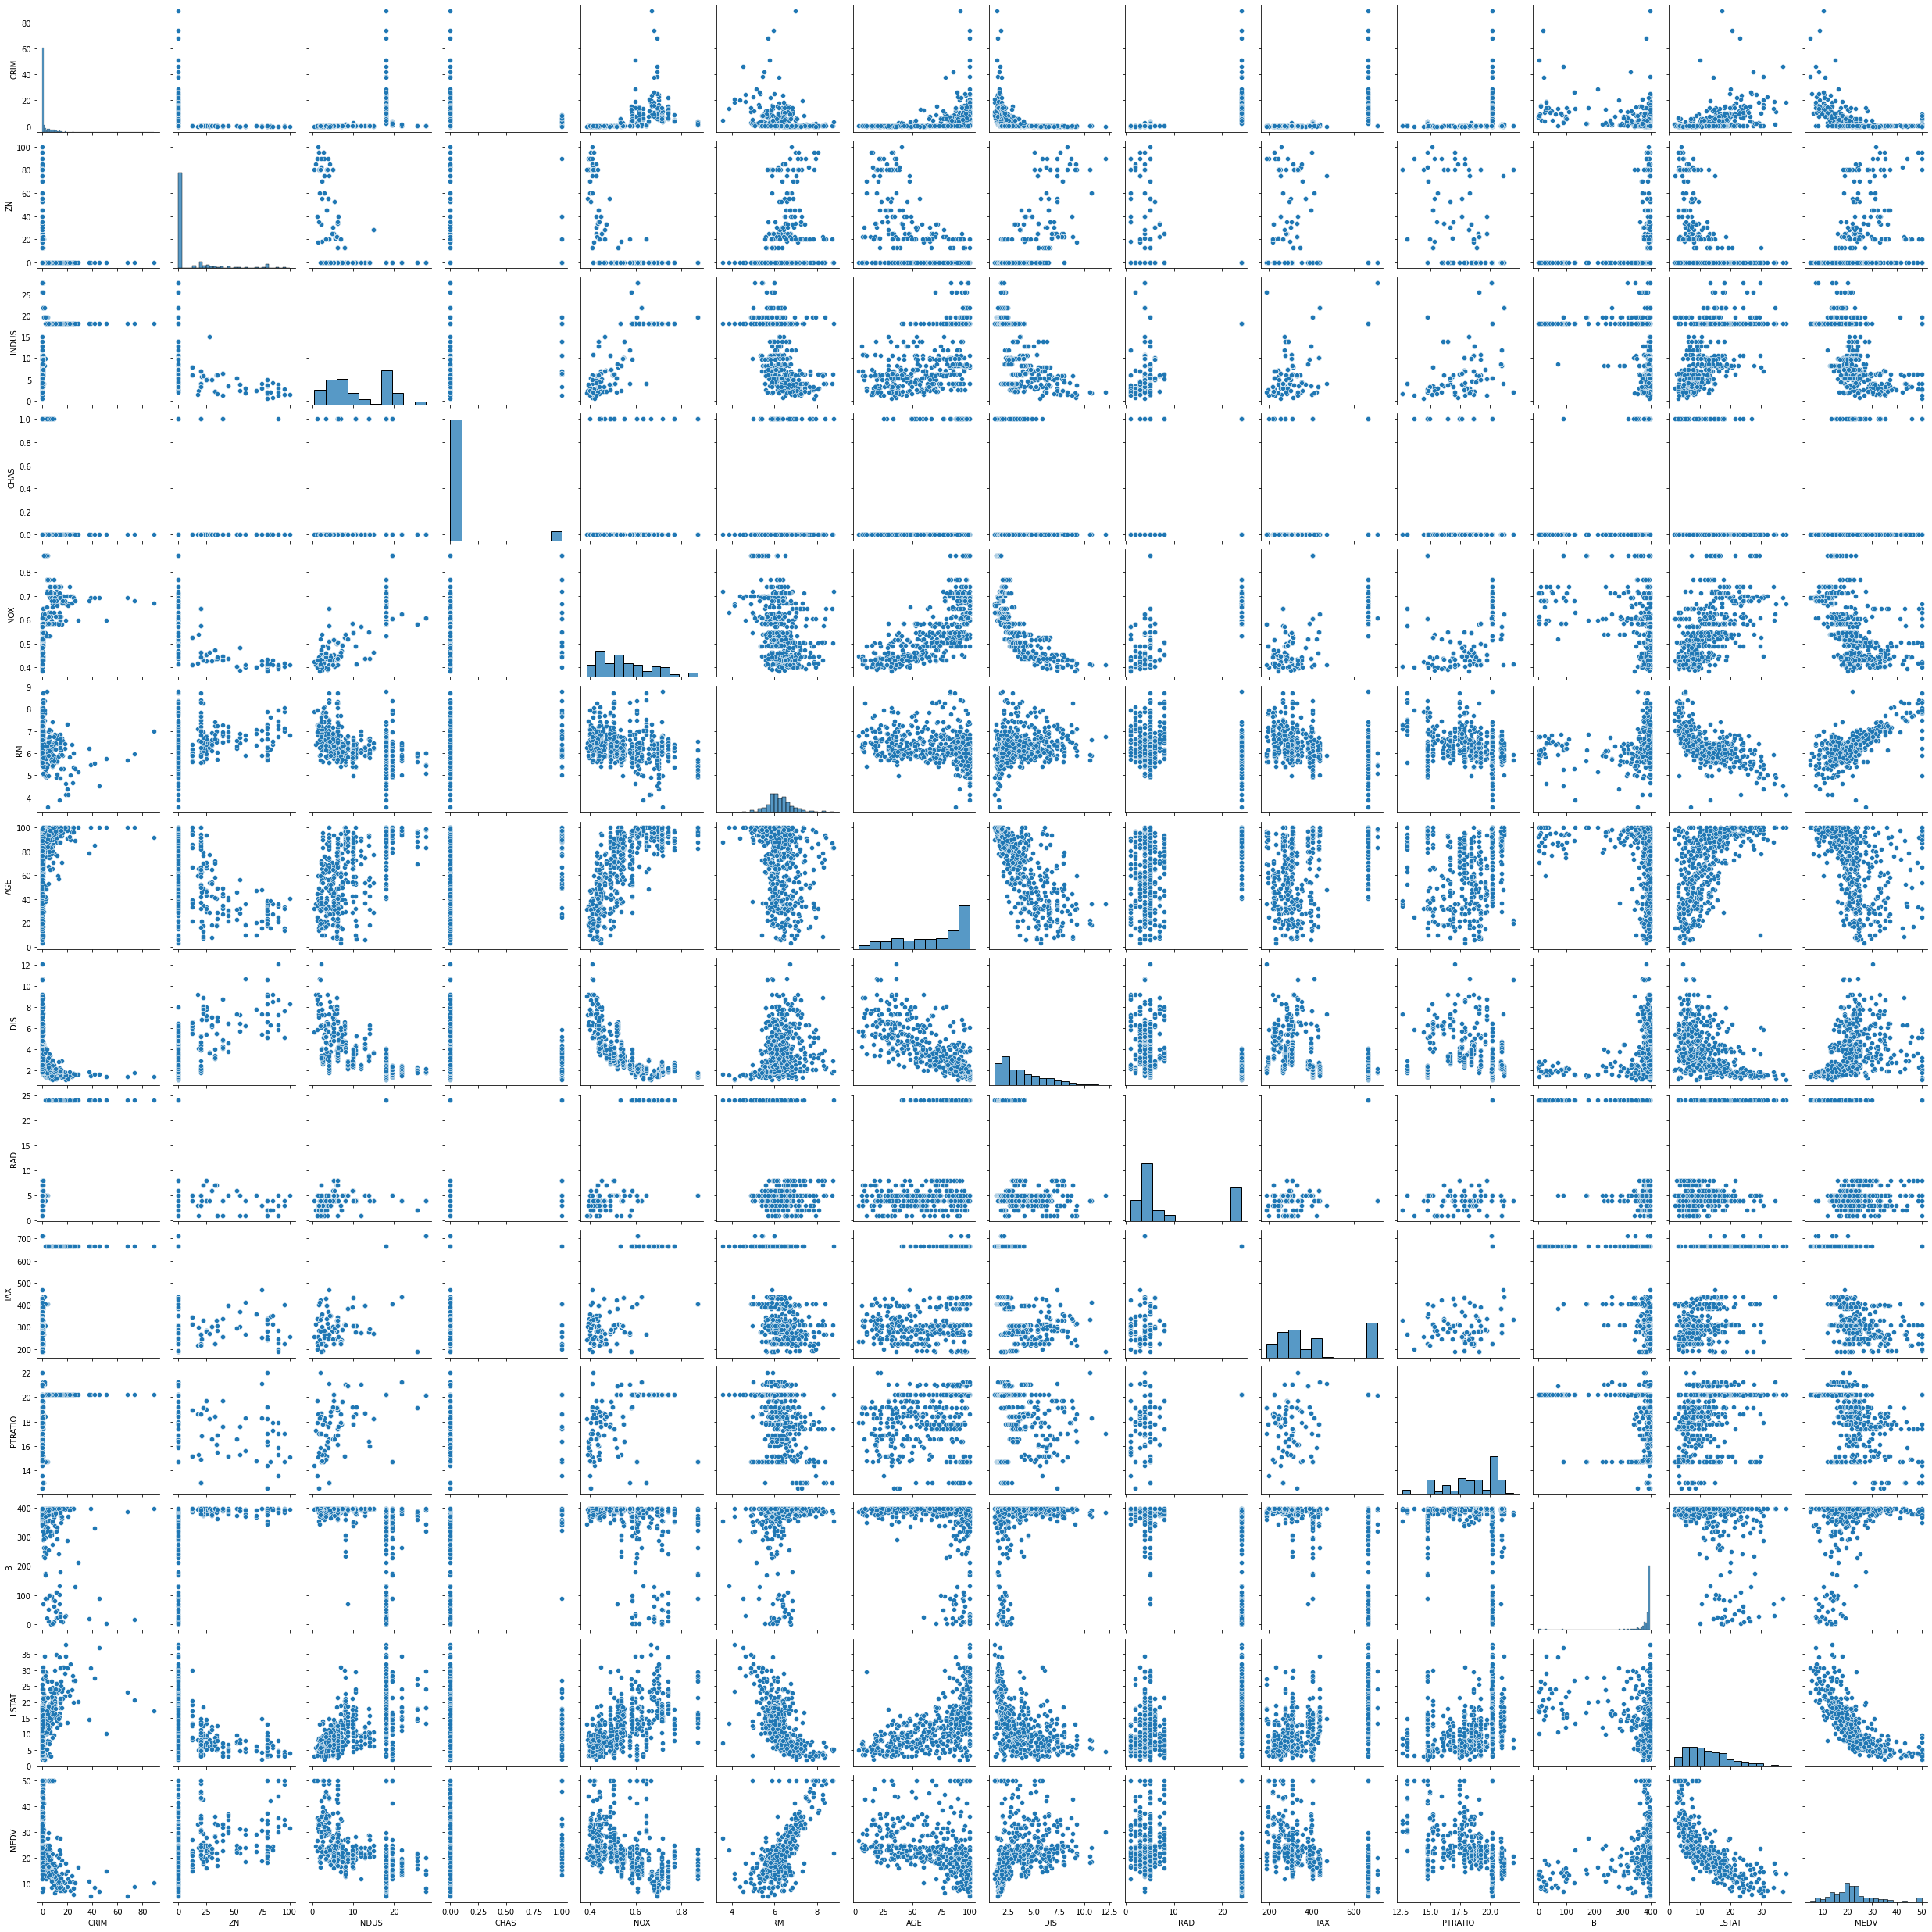

In [5]:
sns.pairplot(housing)

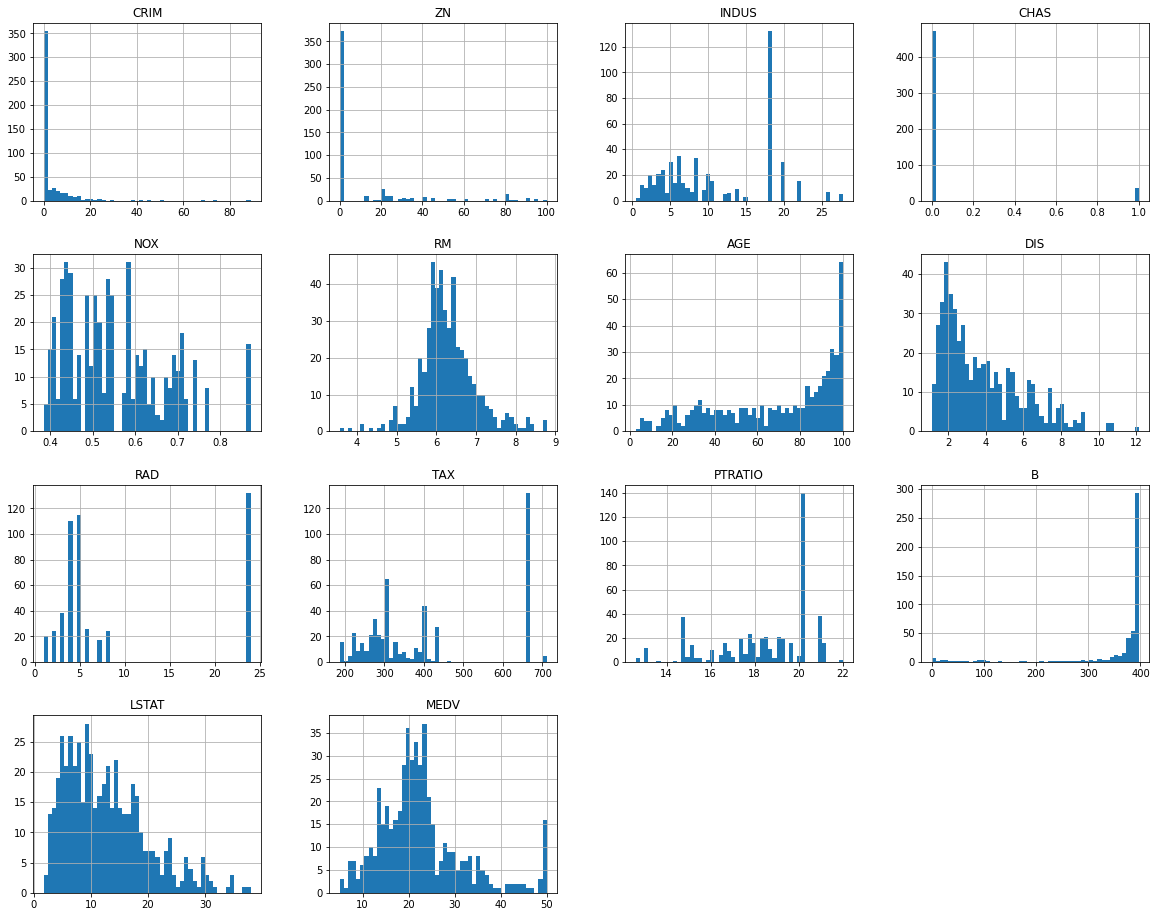

In [6]:
housing.hist(bins=50, figsize=(20,16))
plt.show()

### Correlation Matrix

We are going to create a correlation matrix to summarize the relationships between the variables.

This correlation matrix is closely related with covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.

It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

In [7]:
housing_corr = housing.corr()
housing_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.218584,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.309369,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391264,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.086707,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.306163,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.218584,0.309369,-0.391264,0.086707,-0.306163,1.000000,-0.246143,0.208317,-0.210007,-0.291639,-0.351785,0.129041,-0.616158,0.695930
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.246143,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.208317,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210007,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.291639,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


We will use a heatmap to understand the correlation in a better way

<AxesSubplot:>

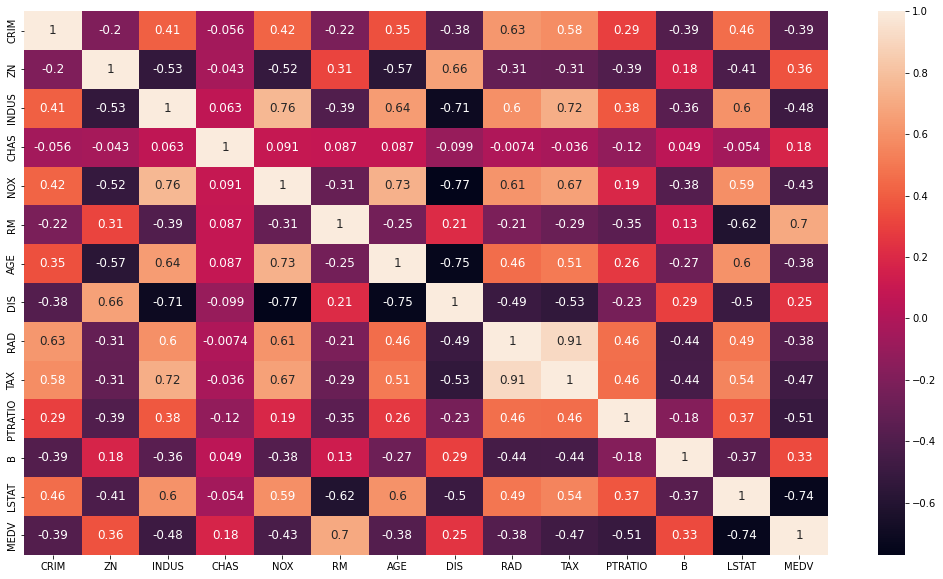

In [8]:
fig , af = plt.subplots(figsize = (18,10))
sns.heatmap(housing_corr , annot = True , annot_kws = {'size':12})

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

In [9]:
housing_corr.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

we check for features which have a high correlation (+ve or -ve) with our target variable Price. Below getCorrelatedFeature function is used to find those features by comparing their absolute value of correlated features with threshold.

In [10]:
housing_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695930
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [11]:
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if(abs(corrdata[index])> threshold):
            feature.append(index)
            value.append(corrdata[index])
            print(index)
    df=pd.DataFrame(data=value, index=feature, columns=['corr value'])
    return df

In [12]:
threshold=0.5
corr_value_df=getCorrelatedFeature(housing_corr['MEDV'], threshold)

RM
PTRATIO
LSTAT
MEDV


In [13]:
corr_value_df

,corr value
RM,0.695930
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


These features found correlating to the target feature Price after passing threshold of 0.5

In [14]:
housing_corr_df = housing[corr_value_df.index]
housing_corr_df.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


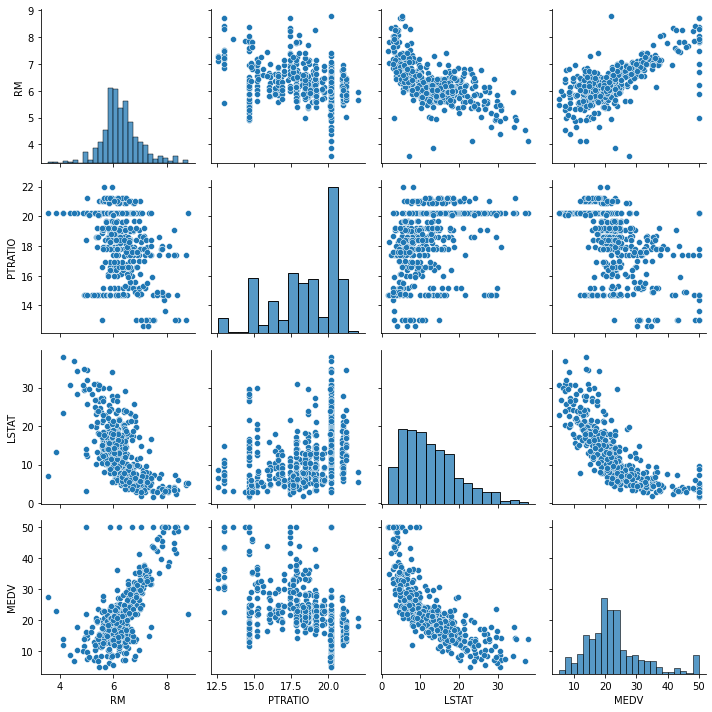

In [15]:
sns.pairplot(housing_corr_df)
plt.tight_layout()

<AxesSubplot:>

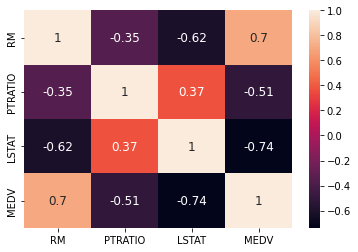

In [16]:
sns.heatmap(housing_corr_df.corr(),annot =True , annot_kws=  {'size':12})

## Spliting Data
we will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [17]:
X = housing.drop(labels = ['MEDV'], axis = 1)
y = housing['MEDV']

In [18]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [19]:
X_train.shape , X_test.shape

((404, 13), (102, 13))

### Splitting in case of imbalanced feature data (Optional)

In [20]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Here CHAS feature has imbalanced distribution of 0 and 1 values. It is possible that while splitting data into train and test dataset all rows with CHAS 1 value could be present in test data. In such cases, the model performance with the test data will not perform very well. 

For such cases, we use stratified sampling on CHAS feature to split data in such a way that it best represents the entire population distribution

In [21]:
# stratified sampling for train and test set to represent the entire distribution
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in strat_split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
X_train = strat_train_set.drop(['MEDV'], axis=1)
y_train = strat_train_set['MEDV']

In [22]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [23]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

### In case if we have missing values, Ways to handle missing attributes

1. Get rid of the missing data points
2. Get rid of the whole attribute i.e. check for correlation
3. Set the value to (zero, mean or median)

Use Imputer for handling missing values. We will impute missing values only on train dataset to avoid data leakage to our test dataset

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       398 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [25]:
#Option 1
temp=X_train.dropna(subset=['RM'])
temp.shape

(398, 13)

In [26]:
#Option 2
X_train.drop('RM', axis=1).head()


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15


In [27]:
#Option 3
X_train['RM'].fillna(X_train['RM'].median())

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [28]:
#Using Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [29]:
#fits into our data and calculates median for all columns 
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X_train_imputed = imputer.transform(X_train)

In [31]:
X_train.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [32]:
housing_labels=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [33]:
temp_df = pd.DataFrame(X_train_imputed, columns=housing_labels)

In [34]:
temp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


## Creating a pipeline

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [36]:
X_train_final=my_pipeline.fit_transform(X_train)

In [37]:
X_train_final

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [38]:
X_train_final.shape

(404, 13)

# Start training the model

In [39]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(X_train_final, y_train)

LinearRegression()

In [40]:
test_imputed = my_pipeline.transform(X_train)

In [41]:
predicted=lin_model.predict(test_imputed)

In [42]:
compare_target = pd.DataFrame({"Predicted":predicted , "Actual": y_train})

In [43]:
compare_target.head()

,Predicted,Actual
254,23.957389,21.9
348,27.241651,24.5
476,20.564235,16.7
321,25.029751,23.1
326,23.744515,23.0


# Performance Metrics

It is difficult to measure the quality of a given model without quantifying the performance of the model. This is typically done by using some type of performance metric, it could be through calculating error, the goodness of fit, or some other useful measurement. Here, we will be calculating the coefficient of determination, R2, to quantify your model's performance.

The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable.

A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

A model can be given a negative R2 as well, which indicates that the model has worst performance in predicting the mean of the target variable.



In [44]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_train, predicted)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('Coefficient of determination:', r2_score(y_train, predicted))

MSE: 23.288516808361283
RMSE: 4.825817734680961
Coefficient of determination: 0.7349667161259432


Since root mean squared error is large, linear regression is not best fitted model to our data. 

### Cross Validation

Using cross validation for better evaluation technique. Let's try and apply cross validation on linear regression model.

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_model, X_train_final, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
rmse_scores

array([4.22341221, 4.26338365, 5.11732541, 3.82649139, 5.33560058,
       4.37135922, 7.46106195, 5.47550313, 4.12982941, 6.06558703])

In [47]:
print('Mean:', rmse_scores.mean())
print('Std Deviation:', rmse_scores.std())

Mean: 5.026955398747702
Std Deviation: 1.0589019177720136


## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_final, y_train)

DecisionTreeRegressor()

In [49]:
predicted=dt_model.predict(test_imputed)
compare_target = pd.DataFrame({"Predicted":predicted , "Actual": y_train})
compare_target.head()

,Predicted,Actual
254,21.9,21.9
348,24.5,24.5
476,16.7,16.7
321,23.1,23.1
326,23.0,23.0


In [50]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_train, predicted)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('Coefficient of determination:', r2_score(y_train, predicted))

MSE: 0.0
RMSE: 0.0
Coefficient of determination: 1.0


Here, mse is 0 and r2 score is 1, which means model has overfitted our data till depth and so decision tree regressor is not the best fit model

### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X_train_final, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores=np.sqrt(-scores)

In [52]:
rmse_scores

array([3.89793566, 5.19185572, 5.52362995, 3.7321935 , 3.97435529,
       3.7558288 , 5.1186424 , 3.90771672, 3.43904056, 4.45028089])

In [53]:
print('Mean:', rmse_scores.mean())
print('Std Deviation:', rmse_scores.std())

Mean: 4.299147950528828
Std Deviation: 0.6904196828655527


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_final, y_train)

RandomForestRegressor()

In [55]:
predicted=rf_model.predict(test_imputed)
compare_target = pd.DataFrame({"Predicted":predicted , "Actual": y_train})
compare_target.head()

,Predicted,Actual
254,22.358,21.9
348,25.418,24.5
476,16.454,16.7
321,23.196,23.1
326,23.447,23.0


In [56]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_train, predicted)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('Coefficient of determination:', r2_score(y_train, predicted))

MSE: 1.5073358712871276
RMSE: 1.2277360755826667
Coefficient of determination: 0.9828458729615207


### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train_final, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores=np.sqrt(-scores)

In [58]:
print('Mean:', rmse_scores.mean())
print('Std Deviation:', rmse_scores.std())

Mean: 3.3261498114611947
Std Deviation: 0.6701078916202783


## Save the model

In [59]:
from joblib import dump, load
dump(rf_model, 'trained_model.joblib')

['trained_model.joblib']

## Testing the model

In [60]:
X_test = strat_test_set.drop(['MEDV'], axis=1)
y_test = strat_test_set['MEDV']
X_test_transformed=my_pipeline.transform(X_test)
final_predicted=rf_model.predict(X_test_transformed)
final_mse=mean_squared_error(y_test, final_predicted)
final_rmse=np.sqrt(final_mse)

In [61]:
final_rmse

3.029869527379219

## Overview

1. Here we tried to fit 3 different models; LinearRegression, DecisionTreeRegressor, RandomForestRegressor
2. In Linear regression model, the rmse value comes out to be 4.82 which is not good enough to consider as the best fit. Applying cross validation on train set, the rmse increases to 5.02
3. In decision tree regressor model, the rmse value comes out to be 0 which is definitely a worst fitted model and we can also derive that model has overfitted our data. Applying cross validation using dt model, rmse value increases to 4.3
4. In random forest regressor model, the rmse value comes out to be 1.22 which is small enough to consider that model might have overfitted the data. Applying cross validation using rf model, the rmse value increase to 3.32 which is less than both of the previous models.
5. Hence the cv random forest regressor model is considered to be the best fitted model.
6. Testing the model on test unseen data, gives rmse score of 3.02 which is a good score.